### Исследование эффективности маркетинговой стратегии для развлекательного приложения Procrastinate Pro+
Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.

#### Цель исследования: 

Найти причины убыточности компании

#### План работы:

- Загрузка данных, их анализ и предобработка
- Задаем функции для расчёта и анализа LTV, ROI, удержания и конверсии
- Исследовательский анализ данных
- Ислледование маркетинга компании
- Оцениваем окупаемость рекламы
- Вывод с рекомендациями для отдела маркетинга

# 1. Анализ и предобработка данных
Изучим данные и выполним предобработку. Посмотрим, есть ли в данных пропуски и дубликаты. 

In [52]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [53]:
try:
    visits, orders, costs = (
        pd.read_csv('visits_info_short.csv'),
        pd.read_csv('orders_info_short.csv'),
        pd.read_csv('costs_info_short.csv')
                            )
except:
    visits, orders, costs = (
        pd.read_csv('/datasets/visits_info_short.csv'),
        pd.read_csv('/datasets/orders_info_short.csv'),
        pd.read_csv('/datasets/costs_info_short.csv')
                            )

In [54]:
visits.sample(5)

,User Id,Region,Device,Channel,Session Start,Session End
224085,343079125158,UK,Android,OppleCreativeMedia,2019-06-03 18:17:37,2019-06-03 19:03:13
204196,119036234493,United States,iPhone,FaceBoom,2019-10-27 20:05:34,2019-10-27 22:24:02
104841,172463282886,United States,Mac,organic,2019-08-11 14:52:32,2019-08-11 15:24:25
97408,667463275504,United States,iPhone,MediaTornado,2019-08-05 12:19:29,2019-08-05 12:21:58
152465,774917503777,United States,iPhone,TipTop,2019-09-21 20:25:01,2019-09-21 20:30:06


In [55]:
orders.sample(5)

,User Id,Event Dt,Revenue
11385,387615663935,2019-08-07 18:34:01,4.99
11792,10579015111,2019-08-10 16:58:26,4.99
23971,180433121949,2019-10-13 01:11:26,4.99
33932,84193849857,2019-08-24 18:55:44,4.99
12599,10579015111,2019-08-15 20:13:43,4.99


In [56]:
costs.sample(5)

,dt,Channel,costs
1252,2019-10-20,LeapBob,11.55
370,2019-05-11,RocketSuperAds,18.72
160,2019-10-08,FaceBoom,201.30
1188,2019-08-17,LeapBob,11.97
130,2019-09-08,FaceBoom,144.10


In [57]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [58]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [59]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [60]:
#проверим поочередно таблички на наличие дубликатов
visits.duplicated().sum()

0

In [61]:
orders.duplicated().sum()

0

In [62]:
costs.duplicated().sum()

0

Пропусков и явных дубликатов нет, но нужно привести к нормальному виду названия колонок, а также сменить тип данных в полях c dt со строкового на дэйттайм

In [63]:
visits.columns= visits.columns.str.strip().str.lower()
orders.columns= orders.columns.str.strip().str.lower()
costs.columns= costs.columns.str.strip().str.lower()
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

In [64]:
visits.rename(columns = {'user id':'user_id', 'session start': 'session_start', 'session end':'session_end'}, inplace = True)
orders.rename(columns = {'user id':'user_id', 'event dt': 'event_dt'}, inplace = True)
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [65]:
#преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [66]:
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

#### Вывод по разделу
Выполнена предобработка данных. Наименования колонок в таблицах приведены к единому стилю, а поля, содержащие даты, приведены к соответствующему типу 

# 2. Задаем функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [67]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [68]:
#функция для создания профелей пользователей
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [69]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [70]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [71]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

##### Создадим функции для визуализации метрик

In [72]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [73]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [74]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [75]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Вывод по разделу

Функции для подсчета показателей удержания, конверсии, LTV, CAC и ROI, а также их визуализации заданы. 

# 3. Исследовательский анализ данных

- Составляем профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постром таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

#### Получим профили пользователей. Для этого вызовем функцию get_profiles(), передав ей данные о посещениях, покупках и тратах на рекламу 

In [76]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head(10))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


#### Определим минимальную и максимальную даты привлечения пользователей

In [77]:
min_analysis_date = profiles['first_ts'].min()
max_analysis_date = profiles['first_ts'].max()
min_analysis_date

Timestamp('2019-05-01 00:00:41')

In [78]:
max_analysis_date

Timestamp('2019-10-27 23:59:04')

Первый пользователь пришел в приложение 1 марта 2019 года, последний пользователь впервые зашел в приложение 27 октября 2019 года

#### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей

In [79]:
profiles_country = (profiles.query('payer == True')
                    .groupby('region')
                    .agg({'user_id':'count'})
                    .sort_values(by='user_id', ascending=False))
total_users_country = profiles.groupby('region').agg({'user_id':'count'}).sort_values(by='user_id', ascending=False)
profiles_country['ration'] = profiles_country['user_id']/total_users_country['user_id']
profiles_country

,user_id,ration
region,,
United States,6902,0.069019
UK,700,0.039829
France,663,0.037994
Germany,616,0.041119


В полученной таблице в столбце ration выведена доля платящих пользователей для каждой страны. Больше всего таких пользователей в США - 6%, и Германии - 4%, Великобритания и Франция чуть меньше - 3.9 и 3.7 соответственно.

#### Теперь выясним, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [80]:
profiles_devices = (profiles.query('payer == True')
                    .groupby('device')
                    .agg({'user_id':'count'})
                    .sort_values(by='user_id', ascending=False))
total_users_device = profiles.groupby('device').agg({'user_id':'count'}).sort_values(by='user_id', ascending=False)
profiles_devices['ration'] = profiles_devices['user_id']/total_users_device['user_id']
profiles_devices

,user_id,ration
device,,
iPhone,3382,0.062079
Android,2050,0.058518
Mac,1912,0.063644
PC,1537,0.050468


Самое большое количество платящих пользователей у iPhone с долей таковых - чуть больше 6%, пользователей андроида и мака значительно меньше, но доля платящих у них не намного отличается - 5.8 и 6.3% . Меньше всего платящих пользователей заходят в приложение с ПК и процент составляет 5.

#### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Для этого построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [81]:
profiles_channel = (profiles.query('payer == True')
                    .groupby('channel')
                    .agg({'user_id':'count'})
                    .sort_values(by='user_id', ascending=False))
total_users_channel = profiles.groupby('channel').agg({'user_id':'count'}).sort_values(by='user_id', ascending=False)
profiles_channel['ration'] = profiles_channel['user_id']/total_users_channel['user_id']
profiles_channel

,user_id,ration
channel,,
FaceBoom,3557,0.122049
TipTop,1878,0.096007
organic,1160,0.020553
WahooNetBanner,453,0.052964
AdNonSense,440,0.113402
RocketSuperAds,352,0.079137
LeapBob,262,0.030633
OppleCreativeMedia,233,0.027077
lambdaMediaAds,225,0.104700


Наибольшее количество платящих пользователей в натуральном выражении пришло с канала FaceBoom, далее TipTop и органически пришедшие пользователи. Если смотреть на долю платящих от общего количества пользователей, то в топе снова FaceBoom с 12 процентами, затем AdNonSense с 11% и lambdaMediaAds с 10.5%, также неплохой процент у TipTop - 9,6%. 

# 4. Маркетинг

- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам.
- Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 


In [82]:
#посчитаем общую сумму расходов на маркетинг
total_cost = costs['costs'].sum().round()
total_cost

105497.0

In [83]:
#построим табличку с суммой распределения затрат на рекламу, распределенной по источникам привлечения
marketing_costs = (costs.groupby('channel')
                    .agg({'costs':'sum'})
                    .sort_values(by='costs', ascending=False))
marketing_costs

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


#### Построим визуализацию динамики расходов на рекламу по времени

In [84]:
#создадим в датасете costs две дополнительные колонки с номерами недели и месяцами
costs['month'] = costs['dt'].astype('datetime64[M]').dt.month
costs['week'] = costs['dt'].astype('datetime64[W]').dt.isocalendar().week
costs

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,5,17
1,2019-05-02,FaceBoom,78.1,5,18
2,2019-05-03,FaceBoom,85.8,5,18
3,2019-05-04,FaceBoom,136.4,5,18
4,2019-05-05,FaceBoom,122.1,5,18
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,10,42
1796,2019-10-24,lambdaMediaAds,6.4,10,43
1797,2019-10-25,lambdaMediaAds,8.8,10,43
1798,2019-10-26,lambdaMediaAds,8.8,10,43


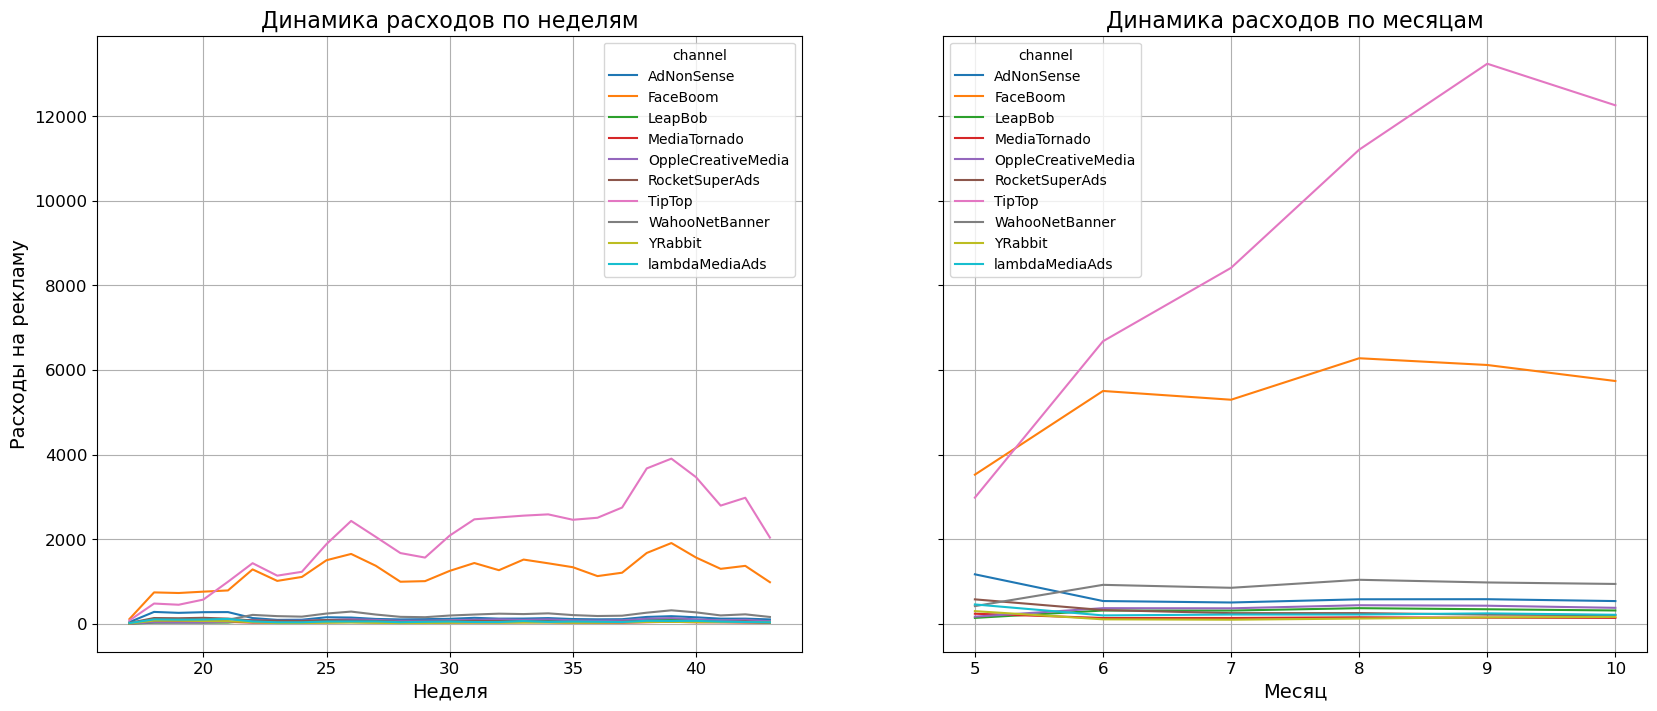

In [85]:
plt.figure(figsize=(20, 8))

# создадим первый график по неделям
ax1 = plt.subplot(1, 2, 1)

costs.pivot_table(index='week', 
                  columns='channel', 
                  values='costs',
                  aggfunc='sum').\
                  plot(grid=True, ax=ax1)

plt.xlabel('Неделя', fontsize= 14)
plt.ylabel('Расходы на рекламу', fontsize= 14)
plt.title('Динамика расходов по неделям', fontsize= 16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# создадим второй график по месяцам
ax2 = plt.subplot(1, 2, 2, sharey=ax1)

costs.pivot_table(index='month',
                  columns='channel',
                  values='costs',
                  aggfunc='sum').\
                  plot(grid=True, ax=ax2)

plt.xlabel('Месяц', fontsize= 14)
plt.ylabel('Расходы на рекламу', fontsize= 14)
plt.title('Динамика расходов по месяцам', fontsize= 16)
plt.xticks(fontsize=12);

Как видно по графикам, больше всего вложений получили Tip Top и FaceBoom. Остальные источники финансировались одинаково понемногу.

#### CAC в разарезе источников

In [86]:
CAC = profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost', ascending=False)
CAC

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


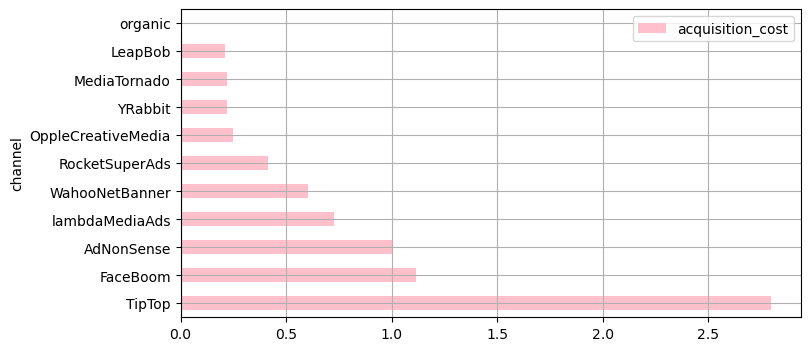

In [87]:
#сделаем барплот для наглядности
CAC.plot(kind='barh', grid=True, figsize=(8, 4), color='pink');

Стоимость привлечения «органических» пользователей равна нулю, потому что они пришли в приложение самостоятельно, а не благодаря рекламе. Привлечение одного пользователя из источника TipTop обошлось компании в среднем в $2.8, а из FaceBoom — примерно $1.2, далее в рейтинге AdNonSense со стоимостью $1, самыми дешевыми источниками оказались YRabbit, MediaTornado и leapBob.

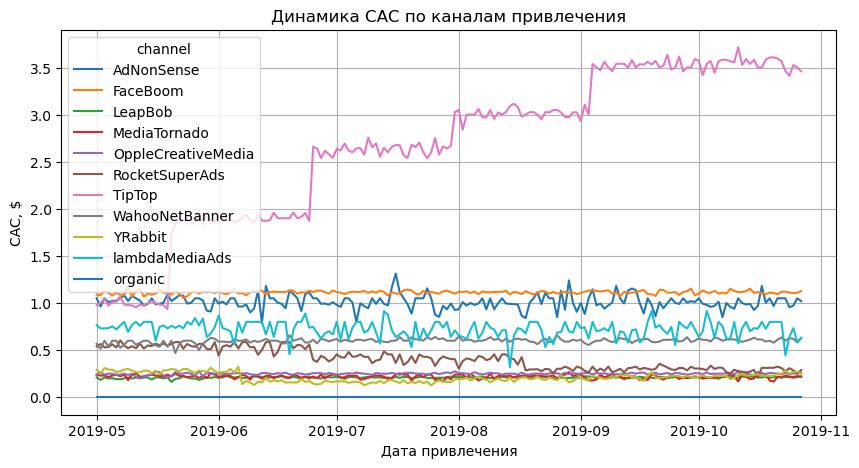

In [88]:
#посмотрим на динамику САС по каналам привлечения 
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

In [51]:
#считаем средний по проекту САС
CAC_mean = profiles['acquisition_cost'].mean()
CAC_mean

1.127481323942928

Из графика видно, что с каждым месяцем компания тратила больше на источник Tip Top. Остальные источники имеют примерно равноценное распределение.

# 5. Окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Моментом анализа считаем 1 ноября 2019 года, горизонт анализа - две недели. Мы исключим из анализа органически привлеченных пользователей, поскольку за их привлечение компания не платила.

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [40]:
#зададим момент и горизонт анализа
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

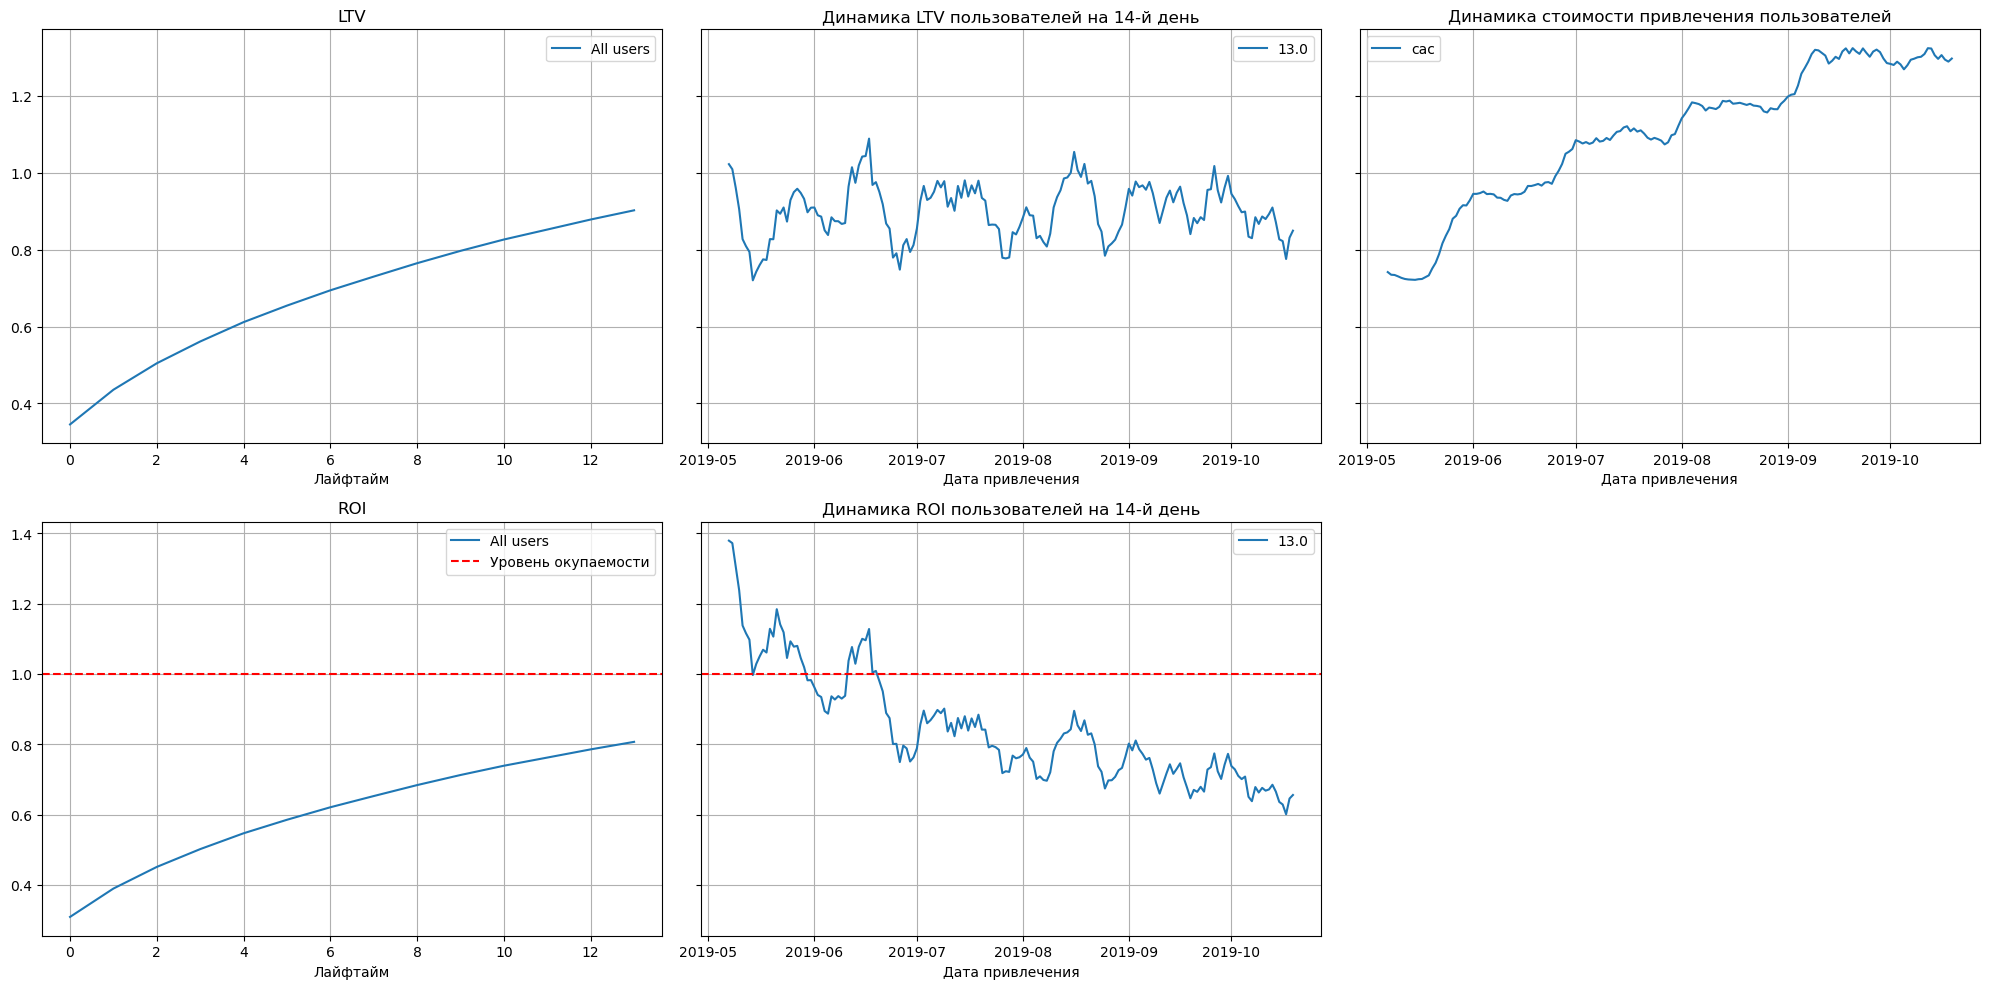

In [41]:
#Для начала оценим общую ситуацию — посмотрим на окупаемость рекламы. 
#Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi()

profiles = profiles.query('channel != "organic"') #исключаем из графиков органических пользователей
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать такие выводы:
- Реклама не окупается. ROI в конце анализируемого периода — около 80%. А в динамике ситуация еще хуже - он падает до 60%.
- CAC растет. Возможно, дело в увеличении рекламного бюджета.
- На LTV влияет сезонный фактор, но и этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

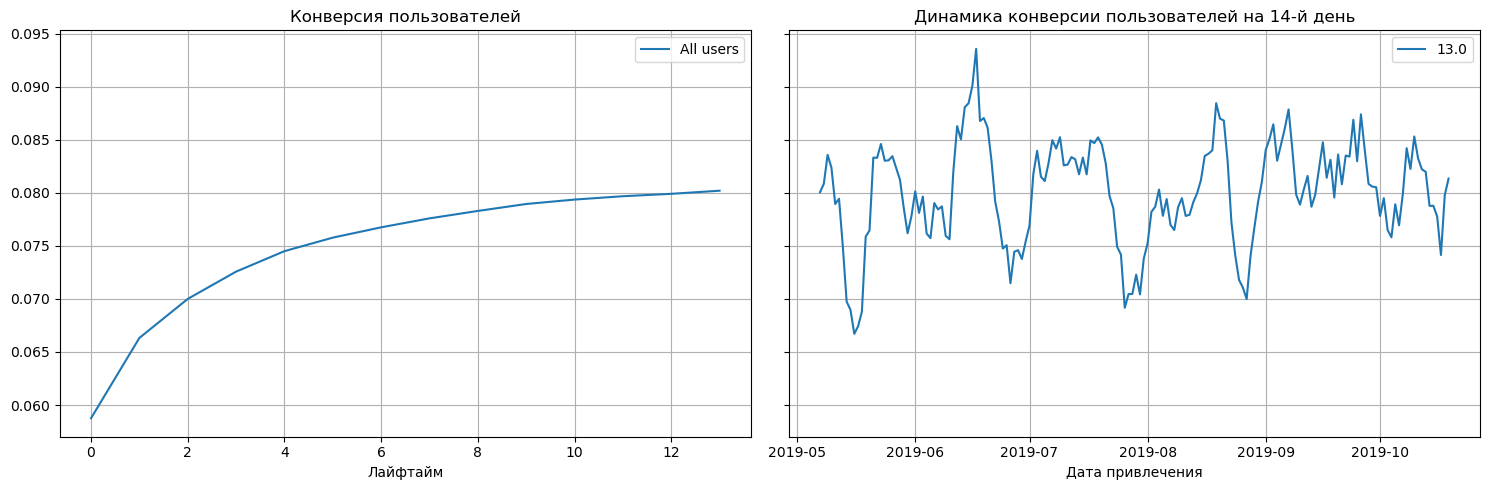

In [42]:
#Проверим конверсию пользователей и динамику её изменения

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия выглядит хорошо, на конец периода она составляет около 80%. Однако, динамика показывает влияние сезонности. 

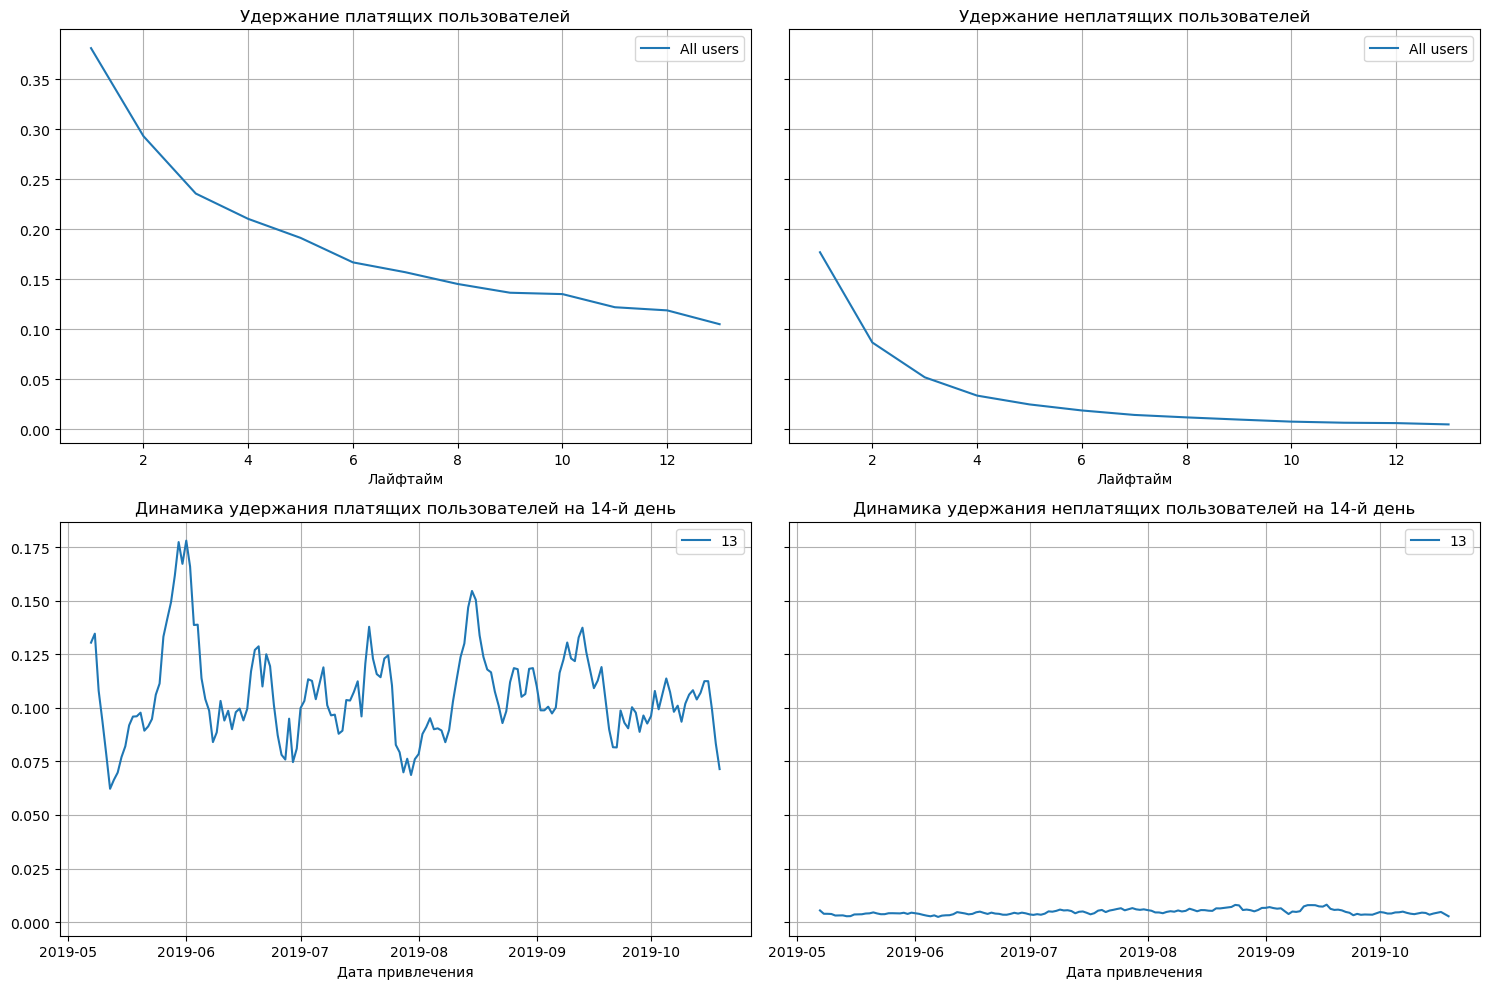

In [43]:
#Посмотрим на показатель удержания пользователей
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 


Показатель удержания довольно низок. Динамика удержания показывает, что платящие пользователи удерживаются лучше неплатящих - у них этот показатель стабильно держится около нуля. 

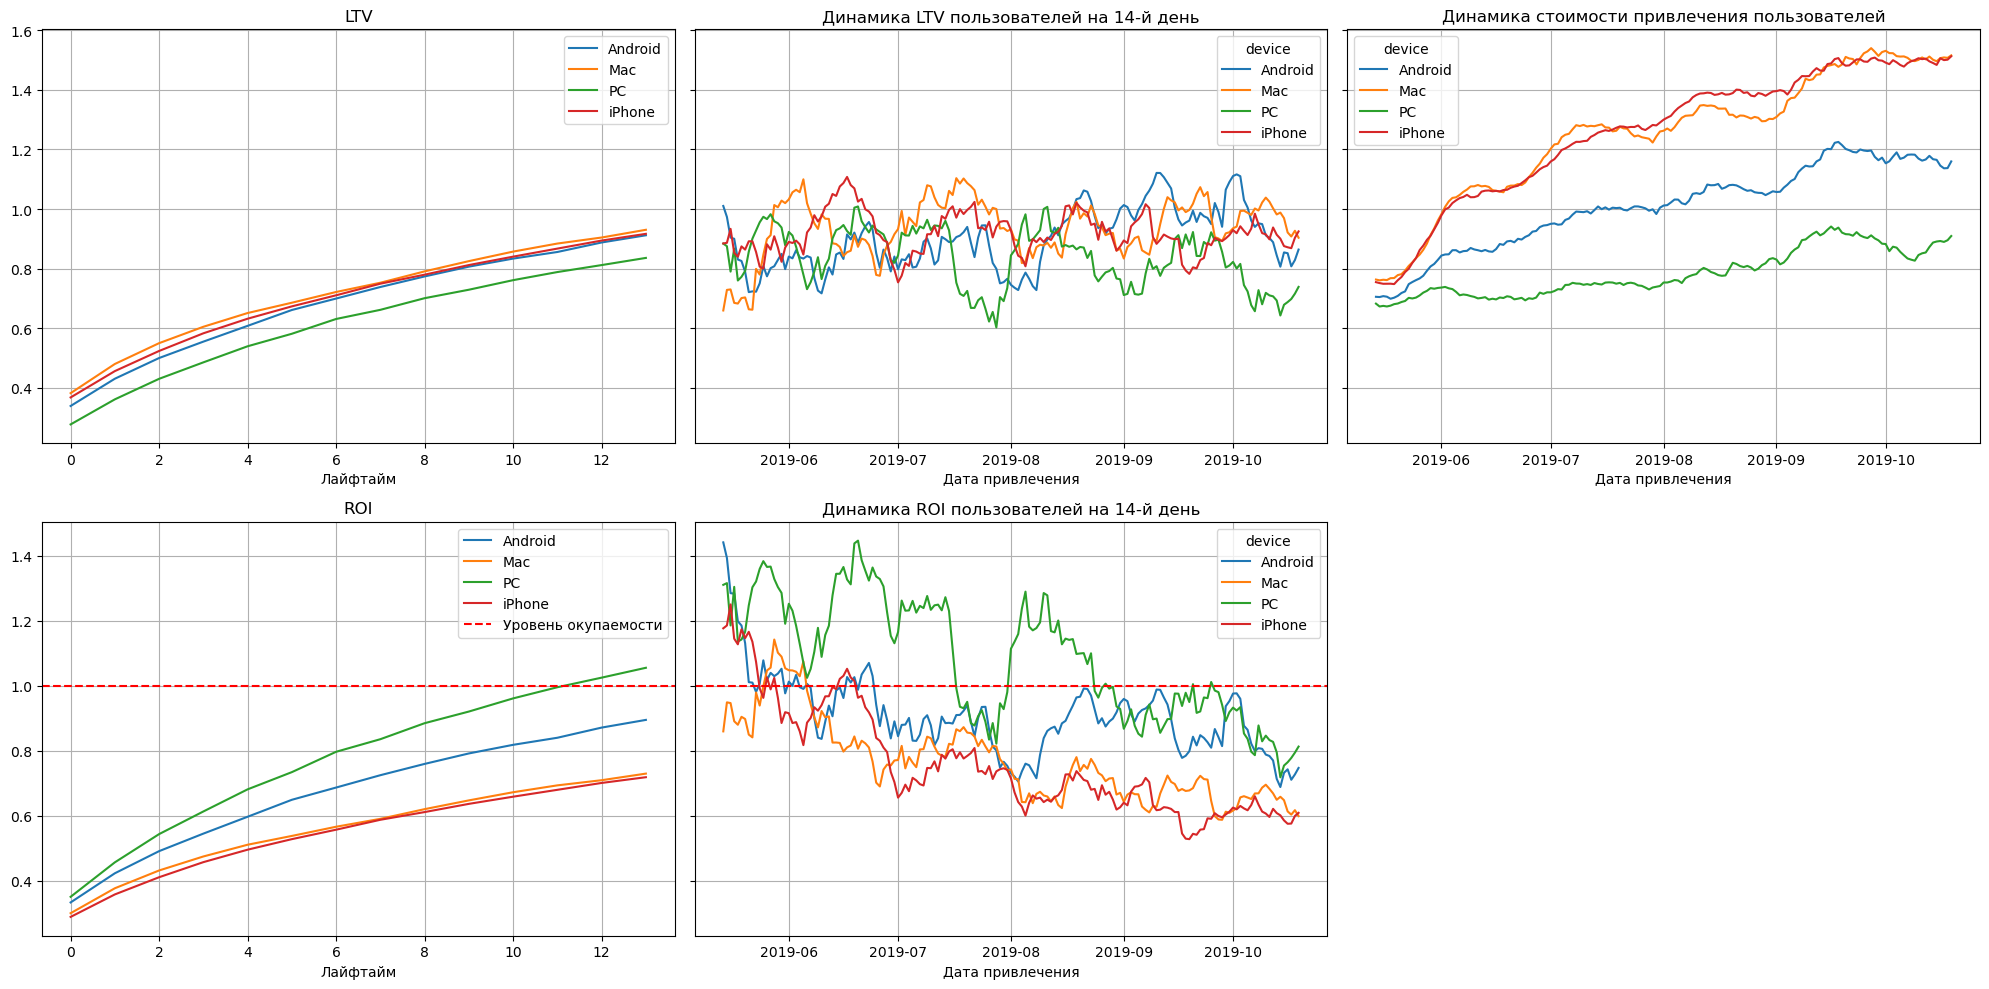

In [44]:
#посмотрим на окупаемость рекламы с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- Пользователи ПК при наименьшей стоимости привлечения окупаются, пользователи же остальных устройств - нет. 
- На графике динамики ROI видно, что в самом начале пользователи всех устройств, кроме МАС окупаются, но спустя месяц перестают. ТОлько пользователи ПК продолжают некоторое время окупаться, но в конце анализируемого периода не окупается уже никто. 

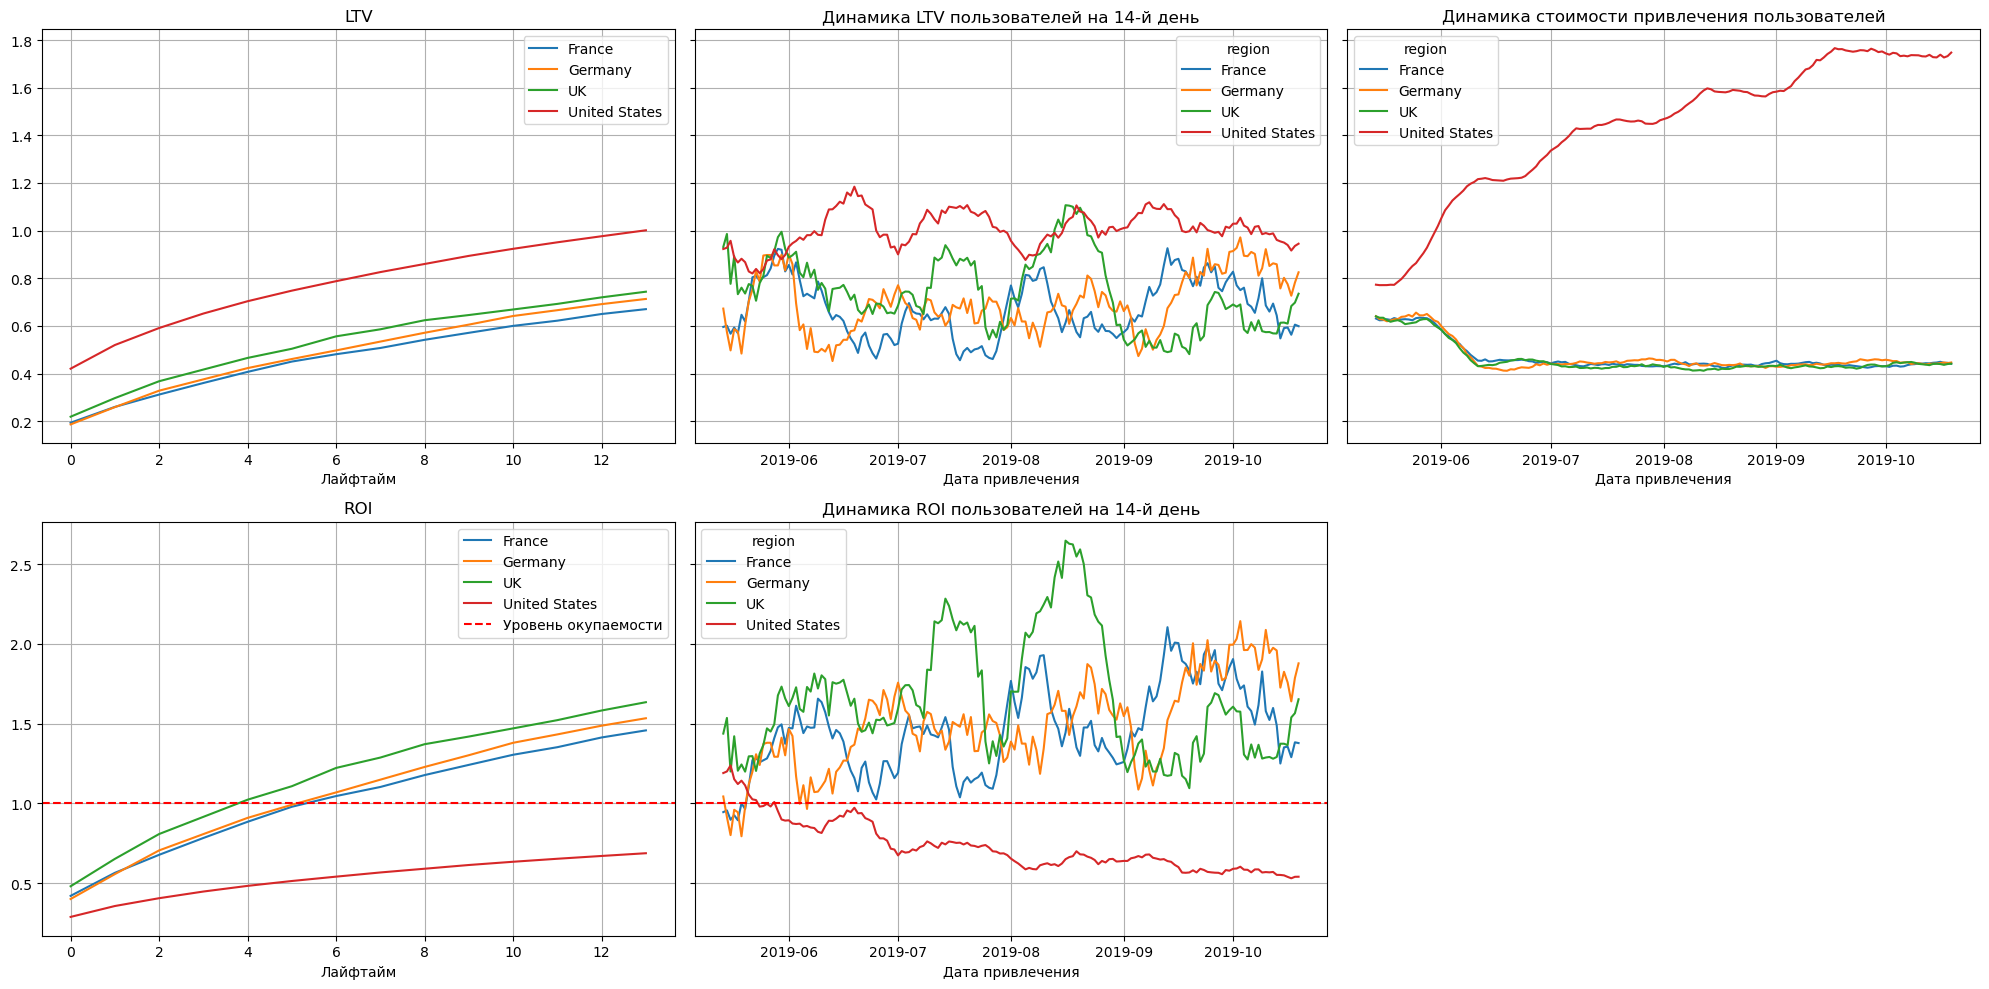

In [45]:
# окупаемость рекламы с разбивкой по странам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- Пользователи из США имеют самый высокий показатель LTV, то есть они самые прибыльные. Они приносят до 1$. Но на их привлечение тратится слишком много средств по сравнению с другими странами - до 1.8, по сравнению с 0.4 для других стран. 
- Привлечение пользователей из США совсем не окупается в отличие от Франции, Германии и Великобритании.
- Хорошую динамику по окупаемости показывает Великобритания.

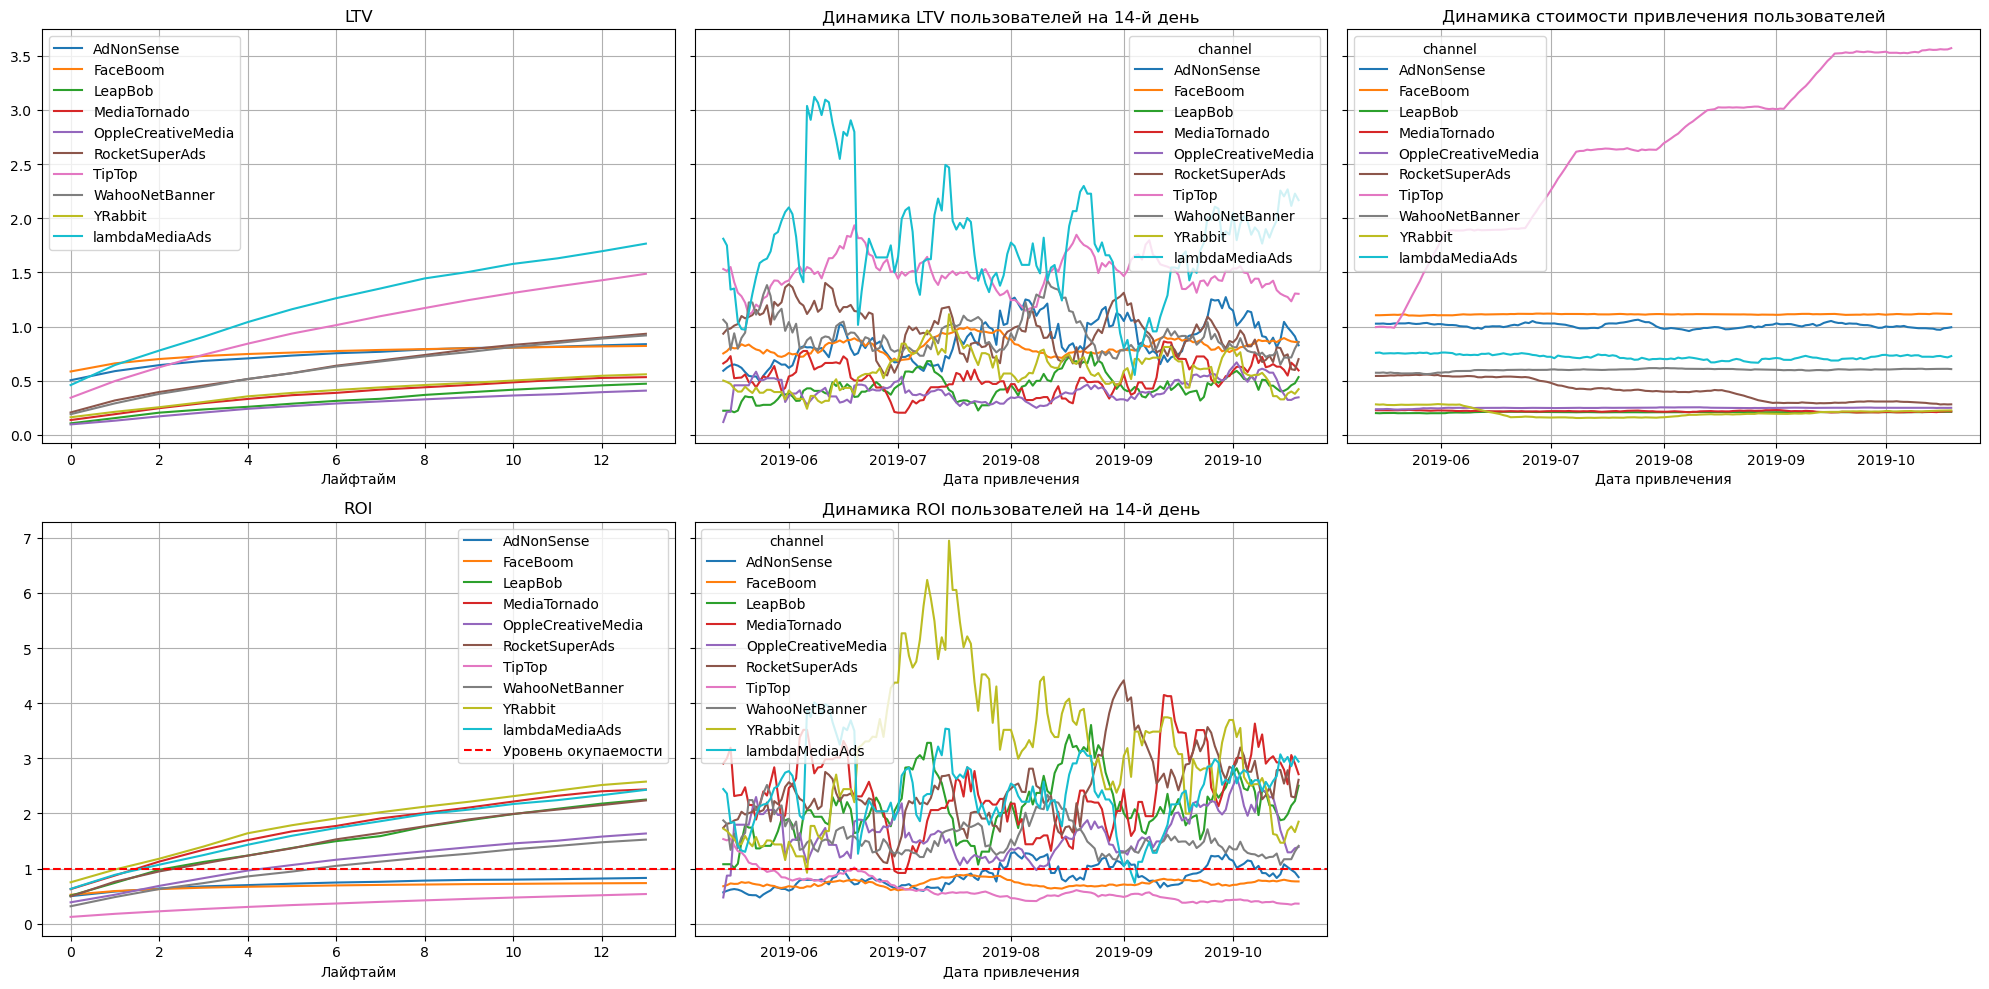

In [46]:
# окупаемость рекламы с разбивкой по каналам привлечения
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- Пользователи от LambdaMediaAds и TipTop самые прибыльные -1.8 и 1.5 соответсвенно.
- LambdaMediaAds в динамике показывает более высокий результат по сравнению с остальными каналами при этом стоимость привлечения на этом канале не превышает - 0.8
- у TipTop неадекватно высокая стоимость привлечения - до 3.5 в конце периода
- три канала не окупаются совсем - TipTop, FaceBoom и AdNonSense
- YRabbit на графике динамики окупаемости с июля по август показывает очень высокую окупаемость - маркетологам стоит учесть этот сезонный феномен.

## Вывод по разделу 

- В целом реклама, направленная на привлечение пользователей, не окупается. 
- ROI в конце анализируемого периода — около 80%. 
- CAC растет. Возможно, дело в увеличении рекламного бюджета.
- Пользователи MAC и IPhone имеют самую высокую стоимость привлечения и совсем не окупаются. Показатель окупаемости пользоветелй этих устройств имеет тенденцию к снижению. 
- Пользователи из США имеют самый высокий показатель LTV, то есть они самые прибыльные. Они приносят до 1$.<b/> Но на их привлечение тратится слишком много средств по сравнению с другими странами - до 1.8, по сравнению с 0.4 для других стран. 
- Эти три канала не окупаются совсем - TipTop, FaceBoom и AdNonSense. У канала привлечения TipTop неадекватно высокая стоимость привлечения - до 3.5 в конце периода.

Вероятно, проблемы с окупаемостью могут быть вызваны неадекватно высокими тратами на привлечение пользователей из США по каналу TipTop. 

# Общий вывод

Целью исследования было выявить причины убыточности рекламной кампании развлекательного приложения Procrastinate Pro+ и помочь компании выйти в плюс. 
В ходе исследования были выявлены следующие причины неэффективности привлечения пользователей:
- Неадекватно высокая стоимость привлечения пользователей из США
- Чрезмерные вложения в рекламный источник TipTop при невысокой эффективности этого канала

Рекомендации для отдела маркетинга:

- Обратить внимание на привлечение пользователей ПК - вероятно, именно с персонального компьютера удобнее пользоваться приложением. Такие пользователи имеют невысокую стоимость привлечения и окупаются быстрее. 
- Обратить внимание на привлечение пользователей из Великобритании - она показывает хорошую динамику окупаемости. 
- Снизить затраты на привлечение стоимости пользователей США - объем инвестиций в рекламу по этой стране чрезмерен и соответсвтенно привлечение пользователей оттуда не окупается.
- Сравнять объемы финансирования рекламного источника TipTop до уровня остальных источников, поскольку привлечение клиентов из этого канала не окупается совсем, но приносит слишком большие траты компании. Однако, отказываться от этого источника совсем - не рекомендуется, потому что пользователи, привлеченные оттуда, одни из самых прибыльных для компании. 
- LambdaMediaAds в динамике показывает более высокий результат по сравнению с остальными каналами при этом стоимость привлечения на этом канале не превышает - 0.8. В этот канал стоит вложить больше.
- YRabbit на графике динамики окупаемости с июля по август показывает очень высокую окупаемость - маркетологам стоит учесть этот сезонный феномен.